## Практическое задание 4

In [1]:
import math
import random
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def edf(samples, x): # emperica; distribusion function
    return samples[samples < x].shape[0] / samples.shape[0]

In [3]:
def pdf_uniform(a, b, x): # probability density function
    return 1 / (b - a) if a <= x <= b else 0

In [4]:
def pdf_normal(loc, scale, x):
    return np.exp(-((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.math.sqrt(2 * np.pi))

### __Задача 1__

О непрерывной равномерно распределенной случайной величине `B` известно, что ее дисперсия равна 0.2. Можно ли найти правую границу величины `B` и ее среднее значение зная, что левая граница равна 0.5? Если да, найдите ее.

Для равномерного распределения справедливы выражения:

$$M(X)=\frac{a+b}{2},\enspace D(X)=\frac{(b-a)^2}{12}$$

Соответственно, из второго выражения, зная дисперсию и левую границу, можно найти правую границу.

$$0.2=\frac{(b-0.5)^2}{12}$$  
$$2.4=b^2-b+0.25$$  
$$b^2-b-2.15=0$$  
$$D = 1 - 4\cdot1\cdot(-2.15)=1+8.6=9.6$$  
$$b_{1,2}=\frac{-b\pm\sqrt{D}}{2a}=\frac{1\pm\sqrt{9.6}}{2}$$  
$$b_1=\frac{1-4\sqrt{0.6}}{2},\enspace b_2=\frac{1+4\sqrt{0.6}}{2}$$

$a_1$ не удовлетворяет геометрическому смылсу задачи, так как находится левее левой границы. Следовательно, правая граница равномерно распределённой случайной величины `B` - $0.5+2\sqrt{0.6}$

Далее найдём среднее значение:

$$M(X)=\frac{0.5+2\sqrt{0.6}+0.5}{2}=0.5 + \sqrt{0.6}$$

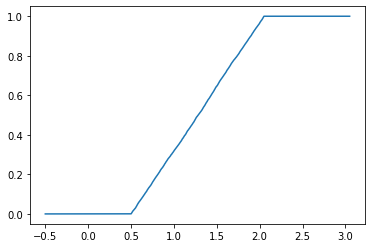

In [5]:
a_task1 = 0.5
b_task1 = 0.5 + 2 * np.math.sqrt(0.6)

samples_task1 = np.random.uniform(a_task1, b_task1, 10000)

ox_task1 = np.linspace(a_task1 - 1, b_task1 + 1, 10000)
edf_task1 = np.array([edf(samples_task1, x) for x in ox_task1])

plt.plot(ox_task1, edf_task1)
plt.show()

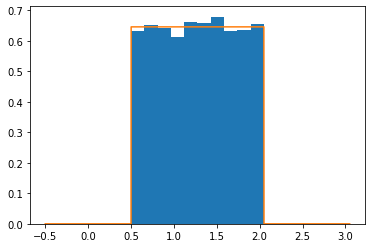

In [6]:
oy_task1 = np.array([pdf_uniform(a_task1, b_task1, x) for x in ox_task1])

plt.hist(samples_task1, density=True)
plt.plot(ox_task1, oy_task1)
plt.show()

In [7]:
print(0.5 + np.math.sqrt(0.6), (b_task1 + a_task1) / 2, '\n', 0.2, (b_task1 - a_task1) ** 2 / 12)

1.2745966692414834 1.2745966692414834 
 0.2 0.20000000000000004


__Ответ:__ правая граница `B` = $0.5+2\sqrt{0.6}$; Среднее значение - $\sqrt{0.6}$

### __Задача 2__

Рост взрослого населения города `X` имеет нормальное распределение, причем, средний рост равен 174 см, а среднее квадратическое отклонение равно 8 см. посчитайте, какова вероятность того, что случайным образом выбранный взрослый человек имеет рост:
1. больше 182 см?
2. больше 190 см?
3. от 166 см до 190 см?
4. от 166 см до 182 см?
5. от 158 см до 190 см?
6. не выше 150 см или не ниже 190 см?
7. не выше 150 см или не ниже 198 см?
8. ниже 166 см?

Задачу можно решить двумя способами: без использования сторонних библиотек (`numpy`, `scipy`, `pandas` и пр.), а затем проверить себя с помощью встроенных функций

$$f(x) = \dfrac{1}{\sigma \sqrt{2 \pi}} \: e^{- \dfrac{(x - a)^2}{2 \sigma^2}}$$

$\mu=174; \enspace \sigma=8$

In [8]:
# получив первообразную от функции плотности распределения получим следующий вид:
def my_cdf(loc, scale, x, more_less='less'):
    if more_less == 'more':
        return math.erfc((x - loc)/(scale * math.sqrt(2))) / 2
    else:
        return math.erf((x - loc)/(scale * math.sqrt(2))) / 2

In [9]:
loc_task2 = 174
scale_task2 = 8

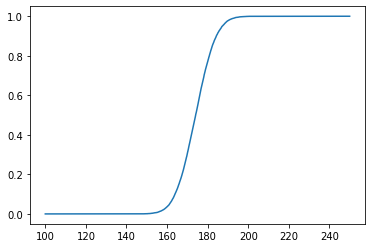

In [10]:
samples_task2 = np.random.normal(loc_task2, scale_task2, size=10001)

ox_task2 = np.linspace(100, 250, 10001)
edf_task2 = np.array([edf(samples_task2, x) for x in ox_task2])

plt.plot(ox_task2, edf_task2)
plt.show()

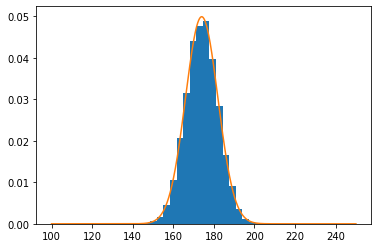

In [11]:
oy_task2 = np.array([pdf_normal(loc_task2, scale_task2, x) for x in ox_task2])

plt.hist(samples_task2, density=True, bins=20)
plt.plot(ox_task2, oy_task2)
plt.show()

1. Больше 182 см:

In [12]:
x1_task2 = 182

In [13]:
1 - stats.norm.cdf(x1_task2, loc_task2, scale_task2)

0.15865525393145707

In [14]:
my_cdf(loc_task2, scale_task2, x1_task2, 'more')

0.15865525393145705

2. Больше 190 см:

In [15]:
x2_task2 = 190

In [16]:
1 - stats.norm.cdf(x2_task2, loc_task2, scale_task2)

0.02275013194817921

In [17]:
my_cdf(loc_task2, scale_task2, x2_task2, 'more')

0.022750131948179216

3. От 166 до 190 см:

In [18]:
x3_1_task2 = 166
x3_2_task2 = 190

In [19]:
stats.norm.cdf(x3_2_task2, loc_task2, scale_task2) - stats.norm.cdf(x3_1_task2, loc_task2, scale_task2)

0.8185946141203637

In [20]:
my_cdf(loc_task2, scale_task2, x3_2_task2, 'less') - my_cdf(loc_task2, scale_task2, x3_1_task2, 'less')

0.8185946141203637

4. От 166 до 182 см:

In [21]:
x4_1_task2 = 166
x4_2_task2 = 182

In [22]:
stats.norm.cdf(x4_2_task2, loc_task2, scale_task2) - stats.norm.cdf(x4_1_task2, loc_task2, scale_task2)

0.6826894921370859

In [23]:
my_cdf(loc_task2, scale_task2, x4_2_task2, 'less') - my_cdf(loc_task2, scale_task2, x4_1_task2, 'less')

0.6826894921370859

5. От 158 до 190 см:

In [24]:
x5_1_task2 = 158
x5_2_task2 = 190

In [25]:
stats.norm.cdf(x5_2_task2, loc_task2, scale_task2) - stats.norm.cdf(x5_1_task2, loc_task2, scale_task2)

0.9544997361036416

In [26]:
my_cdf(loc_task2, scale_task2, x5_2_task2, 'less') - my_cdf(loc_task2, scale_task2, x5_1_task2, 'less')

0.9544997361036416

6. не выше 150 см или не ниже 190 см:

In [27]:
x6_1_task2 = 150
x6_2_task2 = 190

In [28]:
1 - stats.norm.cdf(x6_2_task2, loc_task2, scale_task2) + stats.norm.cdf(x6_1_task2, loc_task2, scale_task2)

0.0241000299798093

In [29]:
1 - my_cdf(loc_task2, scale_task2, x6_2_task2, 'less') + my_cdf(loc_task2, scale_task2, x6_1_task2, 'less')

0.024100029979809312

7. не выше 150 см или не ниже 198 см:

In [30]:
x7_1_task2 = 150
x7_2_task2 = 198

In [31]:
1 - stats.norm.cdf(x7_2_task2, loc_task2, scale_task2) + stats.norm.cdf(x7_1_task2, loc_task2, scale_task2)

0.0026997960632601965

In [32]:
1 - my_cdf(loc_task2, scale_task2, x7_2_task2, 'less') + my_cdf(loc_task2, scale_task2, x7_1_task2, 'less')

0.002699796063260207

7. ниже 166:

In [33]:
x8_task2 = 166

In [34]:
stats.norm.cdf(x8_task2, loc_task2, scale_task2)

0.15865525393145707

In [35]:
1 - my_cdf(loc_task2, scale_task2, x8_task2, 'more')

0.15865525393145707

### __Задача 3 (Дополнительно)__

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

_Подсказка_. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение `scale`, для которого значение `cdf(x=1, loc=1.06, scale=scale)` близко к 0.05. Точности 0.0001 будет достаточно.


In [40]:
def task3a(x, loc, quantile, step, error):
    for scale in np.arange(step, 2, step):
        answer = stats.norm.cdf(x, loc_task3, scale)
        if quantile + error  >= answer >= quantile - error:
            return (answer, scale)

In [41]:
loc_task3 = 1.06
x = 1
quantile = 0.05
step = 1e-6
check, scale_task3 = task3a(x, loc_task3, quantile, step, 0.0001)
check, scale_task3

(0.04990045100093492, 0.036456)

In [42]:
1 - stats.norm.cdf(1.1, loc_task3, scale_task3)

0.13627412858878785

In [43]:
my_cdf(loc_task3, scale_task3, 1.1, 'more')

0.1362741285887879